In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.style
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# Problem 1: Linear Regression

# You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [2]:
df1 = pd.read_csv("cubic_zirconia.csv")

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df1.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [5]:
df1.shape

(26967, 11)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cubic_zirconia.csv data set has 26967 observations (rows) and 10 variables (columns) in the dataset.

In [6]:
df1.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

We have observed from the above part that, the column 'depth' contains null values.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


### Skewness of the data

In [9]:
df1.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

In [10]:
df1.kurt()

Unnamed: 0     -1.200000
carat           1.215364
depth           3.674431
table           1.582166
x              -0.657825
y             159.291616
z              87.006350
price           2.148617
dtype: float64

### Checking for duplicate values

In [11]:
dups = df1.duplicated()
print('Number of duplicate rows =%d'%(dups.sum()))
df1[dups]

Number of duplicate rows =0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


### Observation 

 The cubic_zirconia.csv data set has 26967 observations (rows) and 10 variables (columns) in the dataset.
 
 The first column in the data unnamed: 0 has only serial number and it not useful. so we could drop it 
 
 Price will be our target variable
 
 There are 34 duplicate values present in the dataset, although there is a probability that 2 or more stones can be of similar    dimensions and features but we will drop the duplicates so avoid any overlapping.
 
 kewness and Kurtosis is also calculated for each column, Data with high skewness indicates lack of symmetry and high value of kurtosis indicates heavily tailed data
 
 Based on the above summary, the data looks good. The mean/median looks nearly same for most of the columns.

### Removing the unnamed column

In [12]:
df1=df1.drop("Unnamed: 0",axis=1)

In [13]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


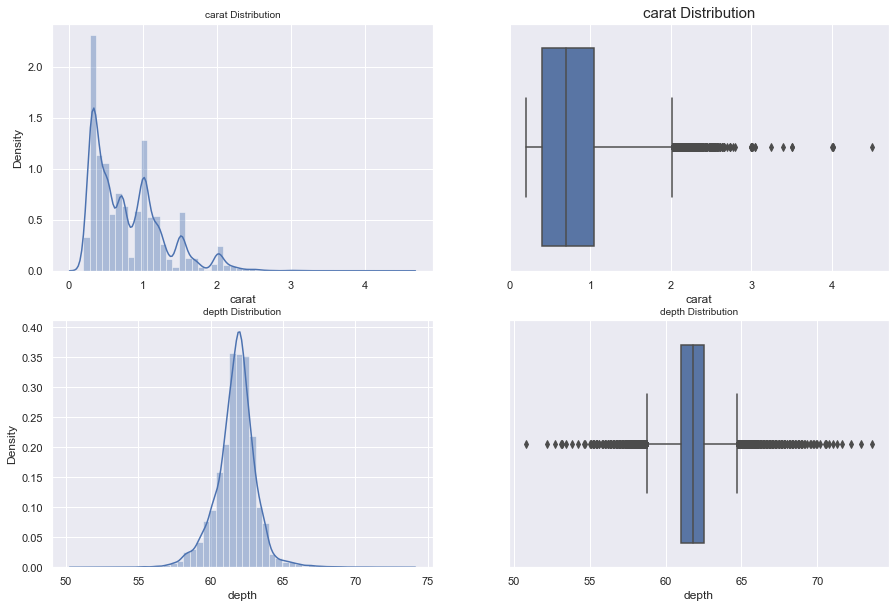

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df1['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df1['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df1['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df1['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10);

The data of carat seems to be left skewed as there are mulitple peak point in the distribution there could multimode.
There seems to have many / large number of outliers in the data.

The majority of the data lies in 0 to 1 range 


The depth contains majority of the data in 60 to 65 range and large of outliers are found in the data. The distribution of depth seems be to normal distribution.

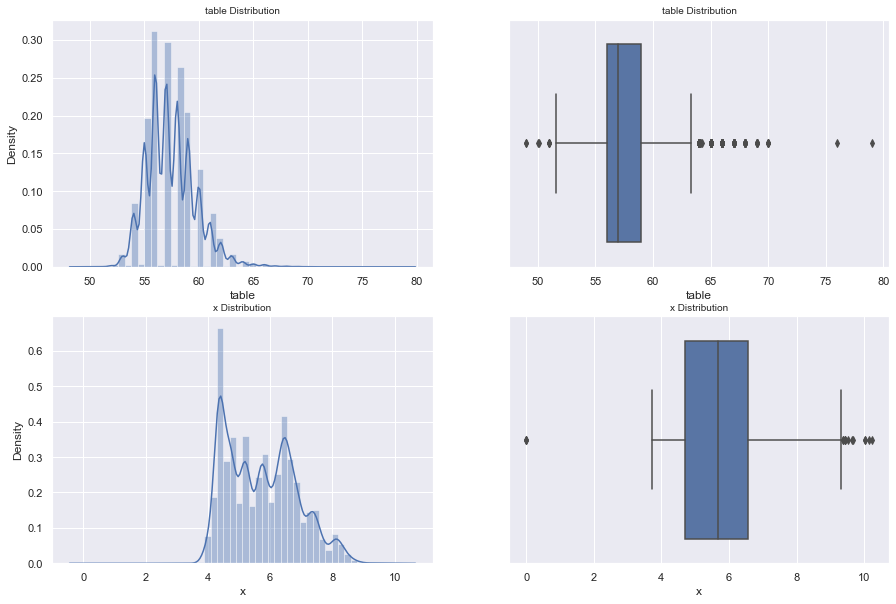

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df1['table'] , ax=axes[0][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df1['table'] , orient = "v" , ax=axes[0][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df1['x'] , ax=axes[1][0])
a.set_title("x Distribution",fontsize=10);

a = sns.boxplot(df1['x'] , orient = "v" , ax=axes[1][1])
a.set_title("x Distribution",fontsize=10);

The both X and Table contains large number of outliers, In table most of the data are present in between the range 55 to 65 


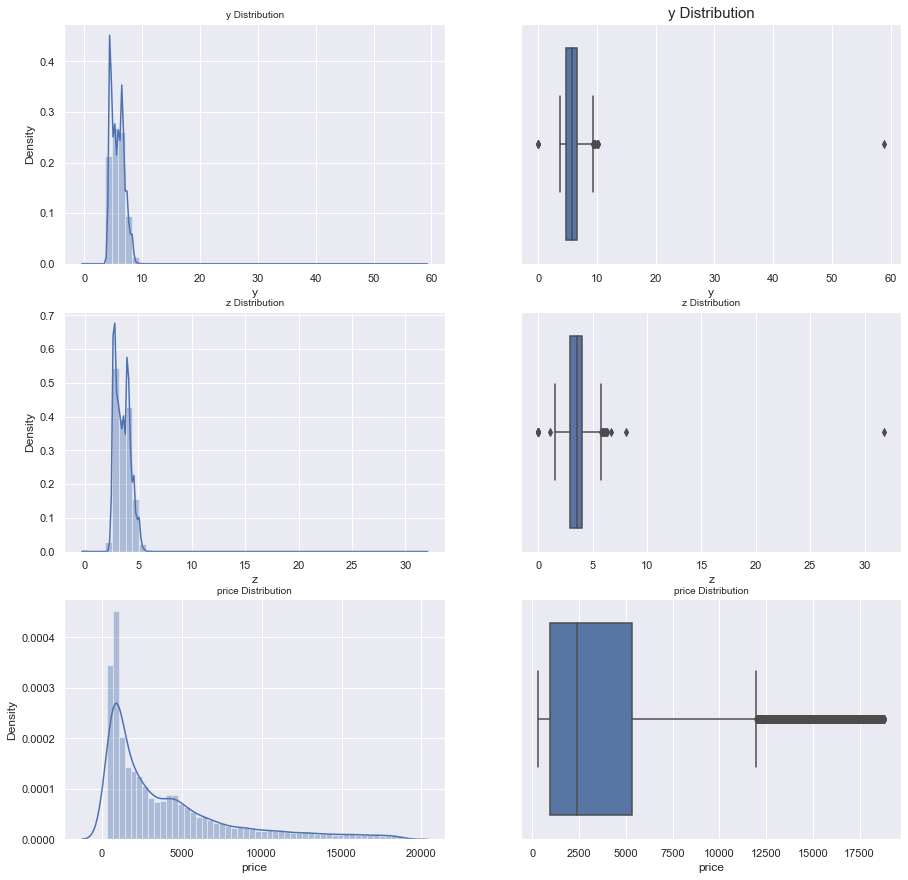

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)

a = sns.distplot(df1['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df1['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df1['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df1['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df1['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df1['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10);

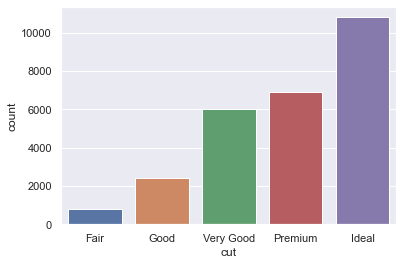

In [18]:
sns.countplot(df1['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

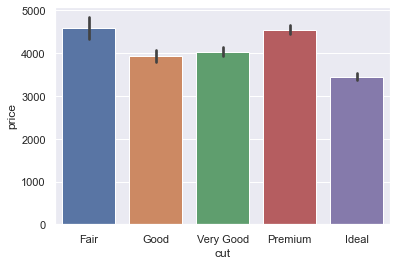

In [20]:
sns.barplot(data = df1, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

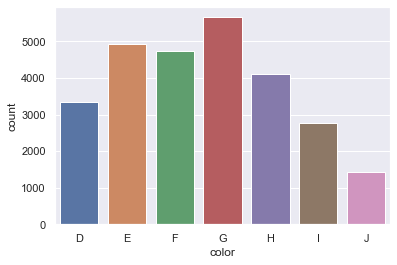

In [19]:
sns.countplot(df1['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J']);

In [ ]:
sns.barplot(data = df1, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] );

In [ ]:
sns.countplot(df1['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']);

In [ ]:
sns.barplot(data = df1, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']);

In [21]:
pd.crosstab(df1['cut'], df1['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


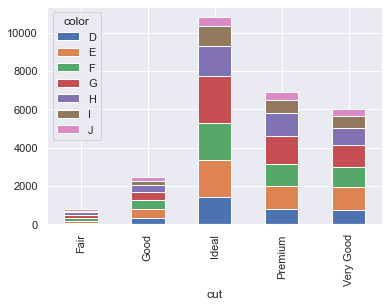

In [22]:
pd.crosstab(df1['cut'], df1['color']).plot(kind = 'bar', stacked = True);

In [23]:
pd.crosstab(df1['cut'], df1['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


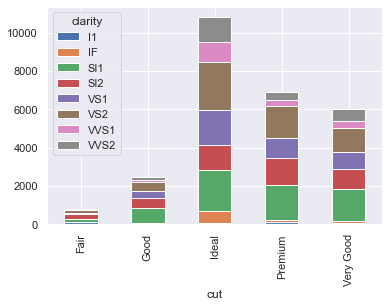

In [24]:
pd.crosstab(df1['cut'], df1['clarity']).plot(kind = 'bar', stacked = True);

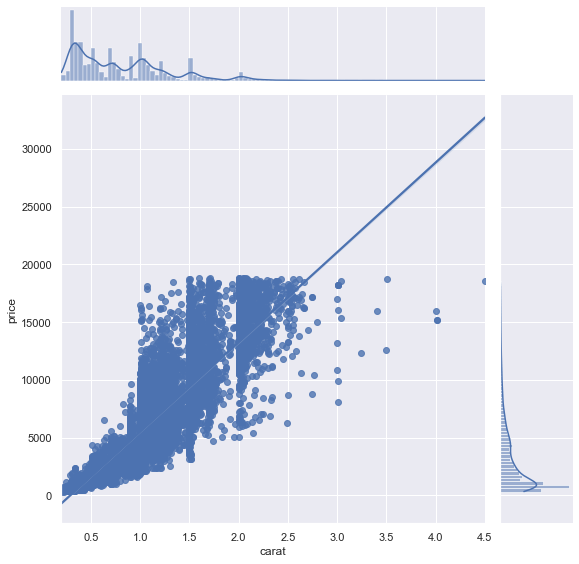

In [25]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('carat', 'price', data = df1, kind='reg', height=8)
plt.show();

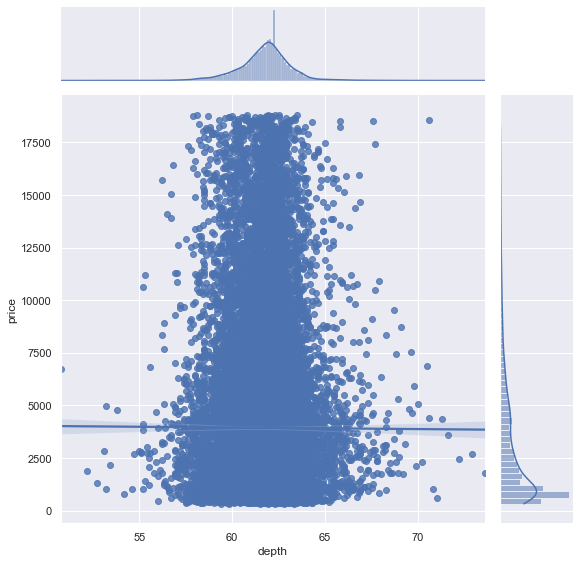

In [26]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('depth', 'price', data = df1, kind='reg', height=8)
plt.show()

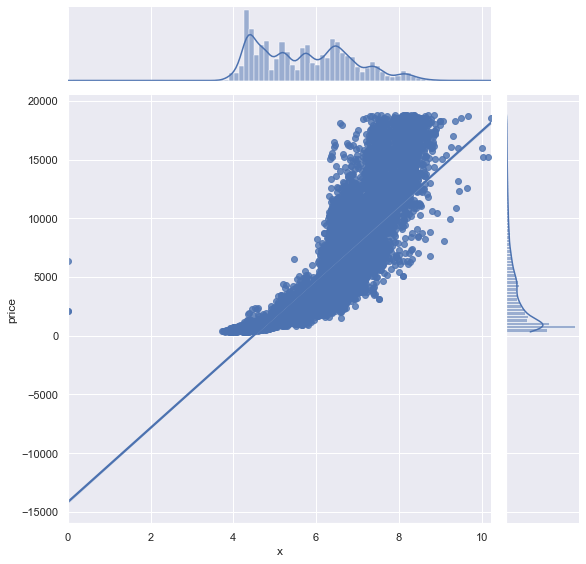

In [29]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('x', 'price', data = df1, kind='reg', height=8)
plt.show()

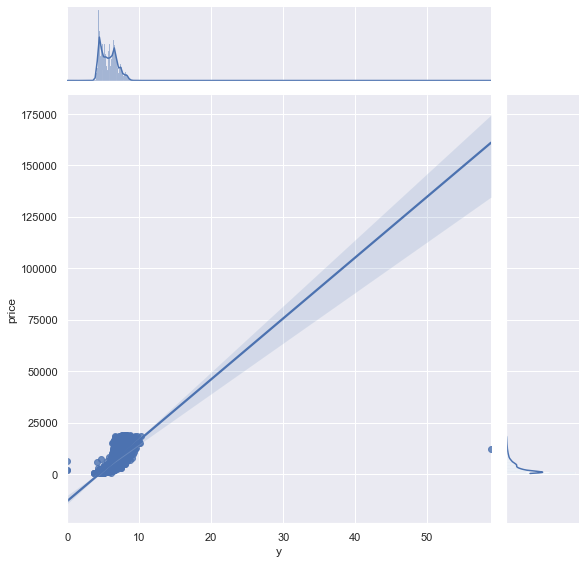

In [28]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('y', 'price', data = df1, kind='reg', height=8)
plt.show()

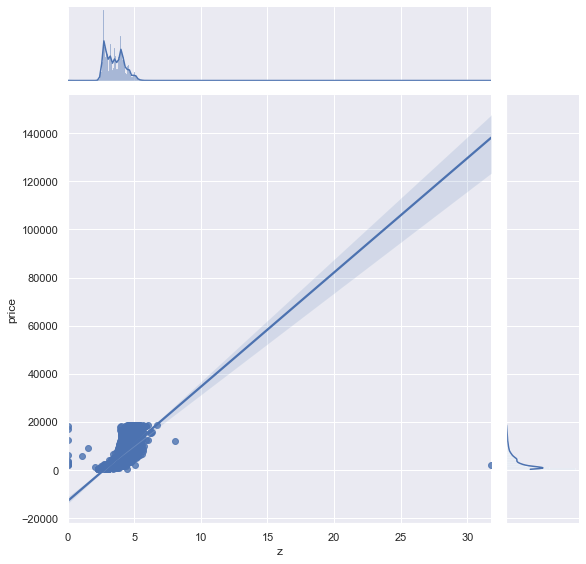

In [27]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('z', 'price', data = df1, kind='reg', height=8)
plt.show()

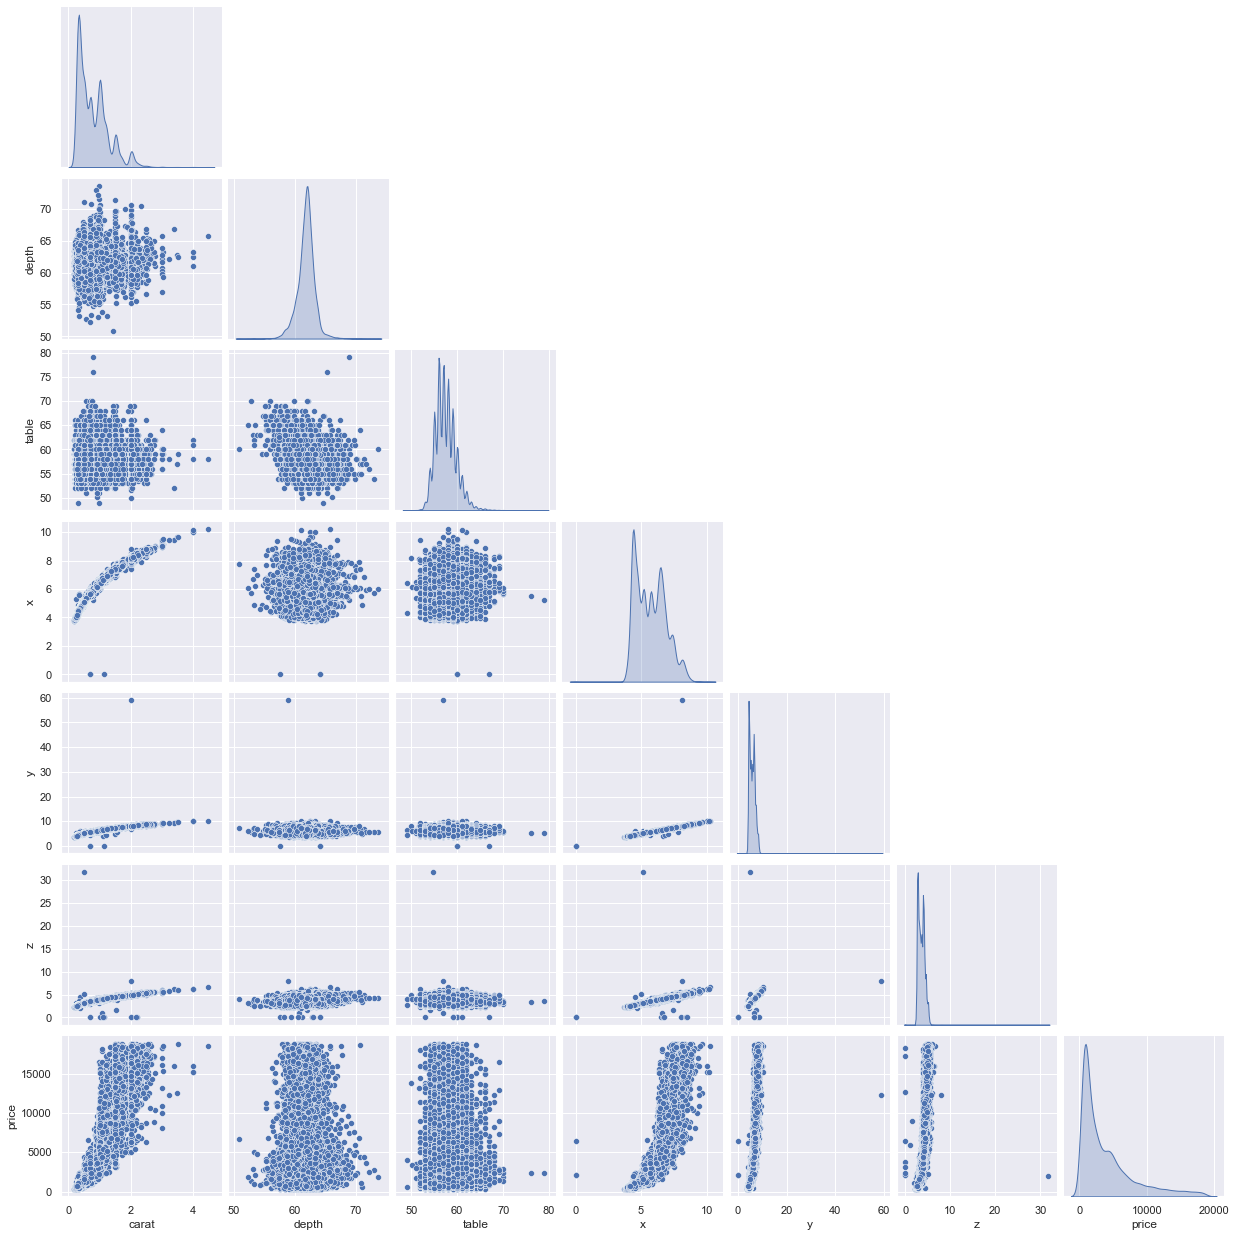

In [30]:
sns.pairplot(df1, diag_kind='kde', corner=True)  
plt.show()

In [32]:
corr_df1 = df1.corr()

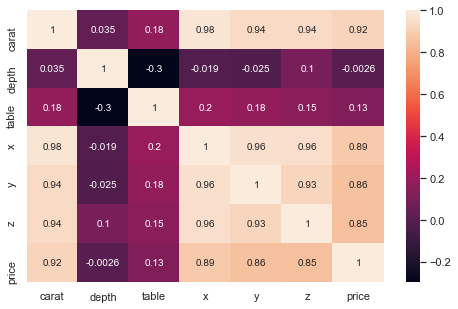

In [206]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_df1, annot=True);
plt.show()

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [35]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




#### Checking if there is value that is “0”

In [39]:
df1.loc[((df1['x'] == 0) | (df1['y'] == 0) | (df1['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [40]:
df1.drop(df1[((df1['x'] == 0) | (df1['y'] == 0) | (df1['z'] == 0))].index, inplace=True)

In [41]:
df1.loc[((df1['x'] == 0) | (df1['y'] == 0) | (df1['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [42]:
for column in df1.columns:
    if df1[column].dtype!= 'object':
        median = df1[column].median()
        df1[column] = df1[column].fillna(median)    
        
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = df1.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df1[num_d.columns] = sc.fit_transform(num_d)

In [44]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


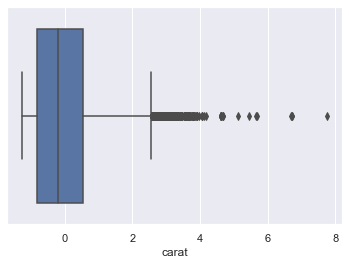

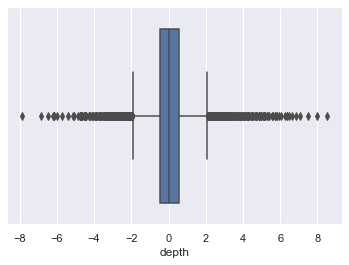

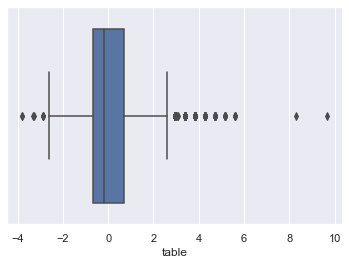

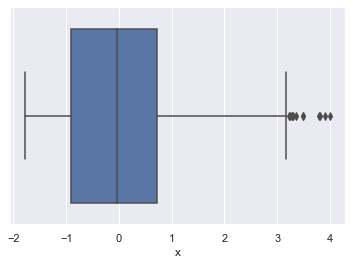

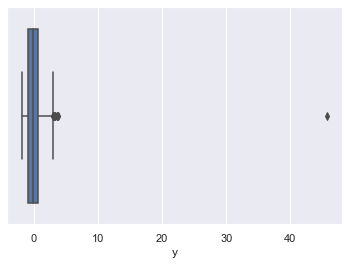

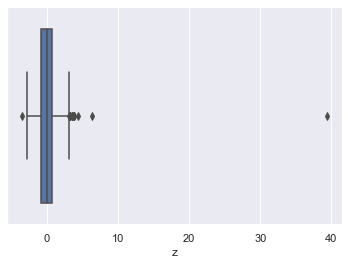

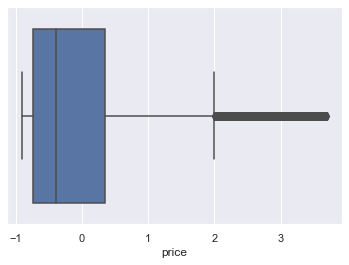

In [46]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z','price']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [52]:
df_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  7


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = [variance_inflation_factor(df_num.values, ix) for ix in range(df_num.shape[1])]

In [54]:
i=0
for column in df_num.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 51.6938051796602
depth ---> 1.4485731064055822
table ---> 1.171610471606316
x ---> 57.50160288642083
y ---> 13.88759850252436
z ---> 16.10155670478154
price ---> 7.779716820361329


In [56]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
for column in df_num.columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

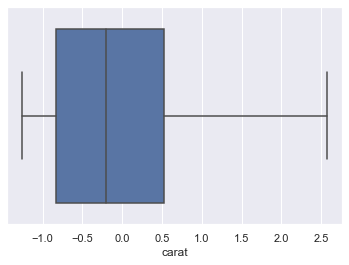

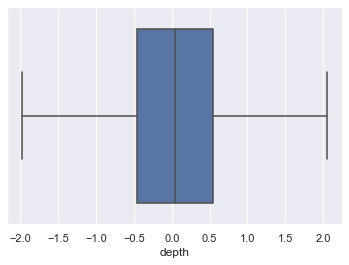

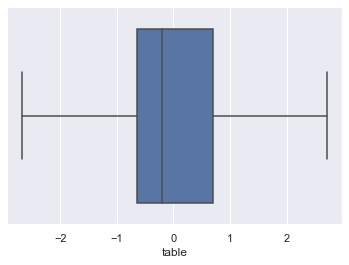

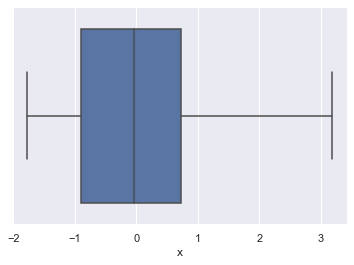

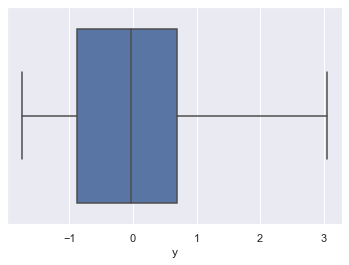

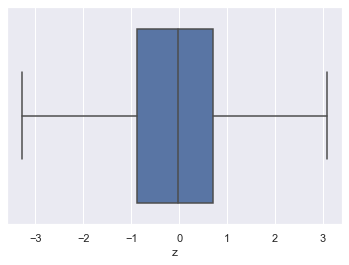

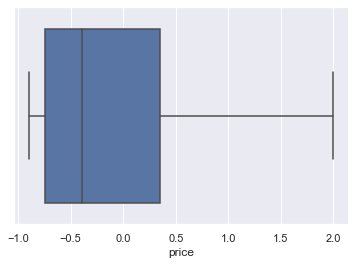

In [60]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [75]:
data = pd.get_dummies(df1, columns=['cut','color','clarity'],drop_first=True)

In [76]:
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [83]:
# Copy all the predictor variables into X dataframe
X = data.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data[['price']]

In [84]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.30 , random_state=1)

In [85]:
print('X_train_mod1',X_train_1.shape)
print('X_test_mod1',X_test_1.shape)
print('y_train_mod1',y_train_1.shape)
print('y_test_mod1',y_test_1.shape)

X_train_mod1 (18870, 23)
X_test_mod1 (8088, 23)
y_train_mod1 (18870, 1)
y_test_mod1 (8088, 1)


### Linear Regression model - Sklearn 

In [86]:
regression_model_1 = LinearRegression()
regression_model_1.fit(X_train_1, y_train_1)

LinearRegression()

In [89]:
for idx, col_name in enumerate(X_train_1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[0][idx]))

The coefficient for carat is 1.1009417847804512
The coefficient for depth is 0.0056051434455706645
The coefficient for table is -0.013319500386804255
The coefficient for x is -0.3050434981963348
The coefficient for y is 0.30391448957926764
The coefficient for z is -0.13916571567988092
The coefficient for cut_Good is 0.09403402912977939
The coefficient for cut_Ideal is 0.1523107462056743
The coefficient for cut_Premium is 0.14852774839849367
The coefficient for cut_Very Good is 0.125838818784527
The coefficient for color_E is -0.04705442233369834
The coefficient for color_F is -0.06268437439142852
The coefficient for color_G is -0.10072161838356827
The coefficient for color_H is -0.207673133116617
The coefficient for color_I is -0.3239541927462753
The coefficient for color_J is -0.4685893027501587
The coefficient for clarity_IF is 0.9997691394634917
The coefficient for clarity_SI1 is 0.638978581827134
The coefficient for clarity_SI2 is 0.4295966234831559
The coefficient for clarity_VS1 

In [90]:
# Let us check the intercept for the model

intercept = regression_model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.756762786304939


In [92]:
# R square on training data
print("The R-squared score on training data is: ",regression_model_1.score(X_train_1, y_train_1))

The R-squared score on training data is:  0.9419557931252712


In [93]:
# R square on testing data
print("The R-squared score on testing data is: ",regression_model_1.score(X_test_1, y_test_1))

The R-squared score on testing data is:  0.9381643998102491


In [96]:
#RMSE on Training data
predicted_train=regression_model_1.fit(X_train_1, y_train_1).predict(X_train_1)
print("The RMSE score on training data is: ",np.sqrt(metrics.mean_squared_error(y_train_1,predicted_train)))

#RMSE on Testing data
predicted_test=regression_model_1.fit(X_train_1, y_train_1).predict(X_test_1)
print("The R-squared score on testing data is: ",np.sqrt(metrics.mean_squared_error(y_test_1,predicted_test)))

The RMSE score on training data is:  0.20690072466418796
The R-squared score on testing data is:  0.21647817772382874


In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [99]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35086119845924
depth ---> 4.573918951598579
table ---> 1.7728852812618994
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.609618194943713
cut_Ideal ---> 14.34812508118844
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723688
color_E ---> 2.371070464762613


In [101]:
data_train = pd.concat([X_train_1, y_train_1], axis=1)

In [102]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [103]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

In [104]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:21:38   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

In [106]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model_1.predict(X_test_1)-y_test_1)**2)

In [107]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math
print("Squareroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual - ",math.sqrt(mse))

Squareroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual -  0.21647817772382866


In [110]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model_1.predict(X_test_1)

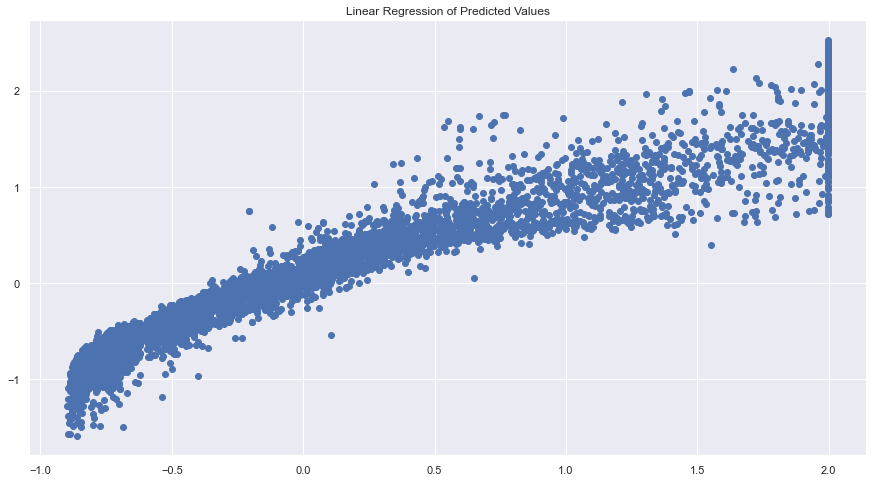

In [112]:
plt.figure(figsize=(15,8))
plt.scatter(y_test_1['price'], y_pred);
plt.title("Linear Regression of Predicted Values");

In [113]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params


Intercept       -0.756657
carat            1.101954
table           -0.013928
x               -0.315617
y                0.283420
z               -0.108789
cut_Good         0.095123
cut_Ideal        0.151173
cut_Premium      0.147355
cut_Very_Good    0.125514
color_E         -0.047114
color_F         -0.062727
color_G         -0.100657
color_H         -0.207568
color_I         -0.323689
color_J         -0.468428
clarity_IF       1.000046
clarity_SI1      0.639804
clarity_SI2      0.430195
clarity_VS1      0.838626
clarity_VS2      0.766683
clarity_VVS1     0.942390
clarity_VVS2     0.931898
dtype: float64

In [114]:
print(lm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:30:01   Log-Likelihood:                 2953.5
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18847   BIC:                            -5680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      0.016    -46.991

In [116]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_1, y_train_1], axis=1)
data_test=pd.concat([X_test_1,y_test_1],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [117]:
# Calculate MSE
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [118]:
#Root Mean Squared Error - RMSE
print ("The Root Mean Squared Error - RMSE = ",np.sqrt(mse))

The Root Mean Squared Error - RMSE =  0.20690072466418763


In [119]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (0.01) * depth + (-0.01) * table + (-0.31) * x + (0.3) * y + (-0.14) * z + (0.09) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

# Problem 2: Logistic Regression and LDA

## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [120]:
df2 = pd.read_csv('Holiday_Package.csv')

In [121]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [122]:
df2.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [123]:
df2.shape

(872, 8)

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


It contains two object data types and rest are integer datatypes.

In [125]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


The mean values and 50 % are nearly same for some columns and that means they may contain outliers.

In [126]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [127]:
dups = df2.duplicated()
print('Number of duplicate rows =%d'%(dups.sum()))
df2[dups]

Number of duplicate rows =0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


There is no null and duplicate values in this dataset.

In [128]:
df2.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [129]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')  # checking for unique values in the object datatype.

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [130]:
df2.Holliday_Package.value_counts(normalize=True) #Percentage

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Univariate / Bivariate analysis

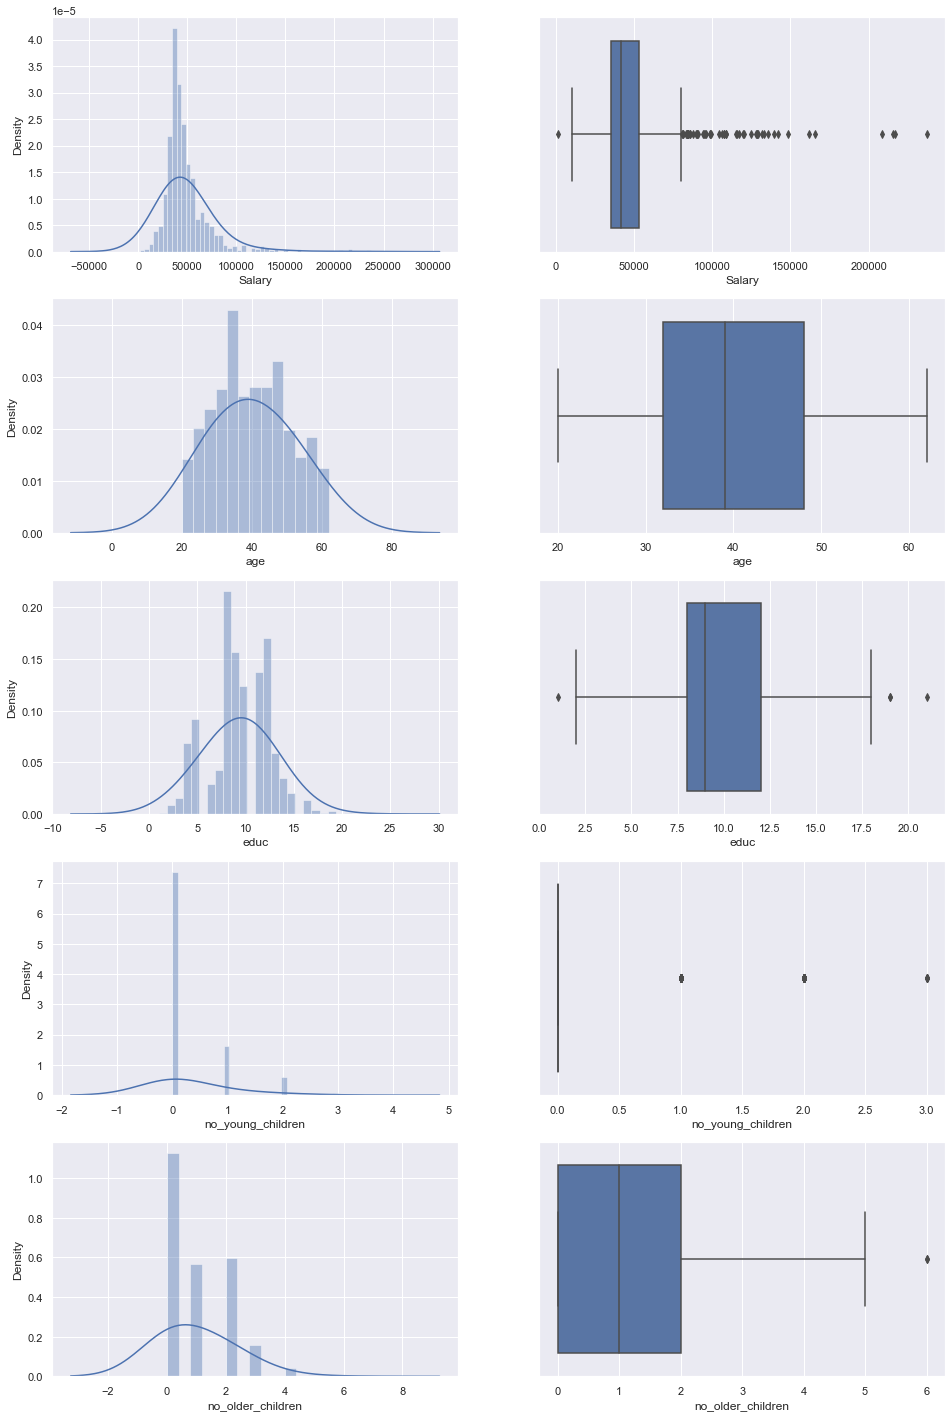

In [131]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(16, 25)

a = sns.distplot(df2['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
#a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df2['Salary'] , orient = "v" , ax=axes[0][1])
#a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df2['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
#a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df2['age'] , orient = "v" , ax=axes[1][1])
#a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df2['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
#a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(df2['educ'] , orient = "v" , ax=axes[2][1])
#a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df2['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
#a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(df2['no_young_children'] , orient = "v" , ax=axes[3][1])
#a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df2['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
#a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(df2['no_older_children'] , orient = "v" , ax=axes[4][1])
#a.set_title("no_older_children Distribution",fontsize=10);

The salary data has more outliers when compared to others.Even, while comparing in the df2.info() funcction the mean and 50 % has simliar equal values hence,the deduction of outliers has been done earlier on assumption but through barplot it confirms that it has more outliers.

### Univariate Analysis for Categorical Variables

<AxesSubplot:xlabel='foreign', ylabel='count'>

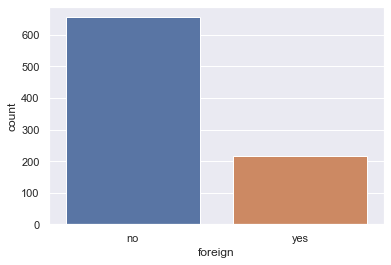

In [132]:
sns.countplot('foreign',data=df2)

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

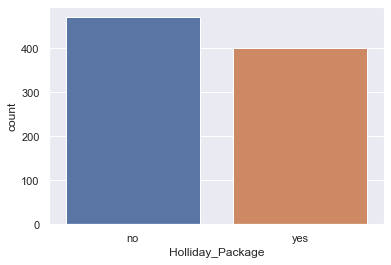

In [133]:
sns.countplot('Holliday_Package',data=df2)

### Holiday package vs salary

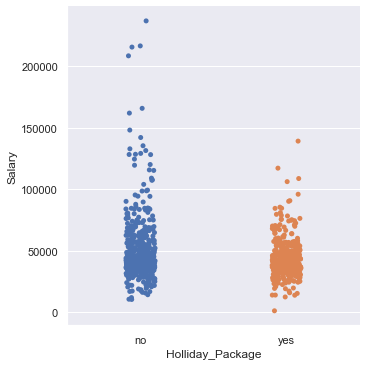

In [134]:
sns.catplot(x='Holliday_Package', y='Salary', kind='strip', data=df2)

### Holiday package vs age 

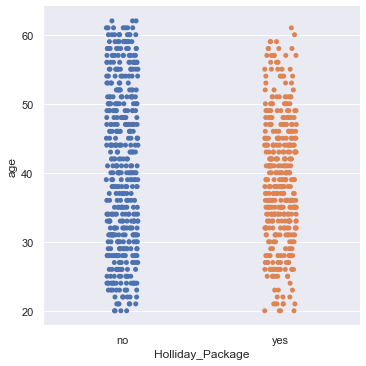

In [135]:
sns.catplot(x='Holliday_Package', y='age', kind= 'strip' , data=df2)

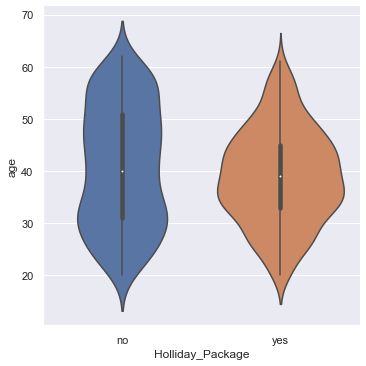

In [136]:
sns.catplot(x='Holliday_Package', y='age', kind= 'violin' , data=df2)

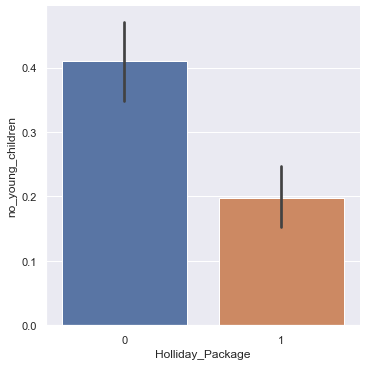

In [211]:
sns.catplot(x='Holliday_Package', y='no_young_children', kind= 'bar' , data=df2)

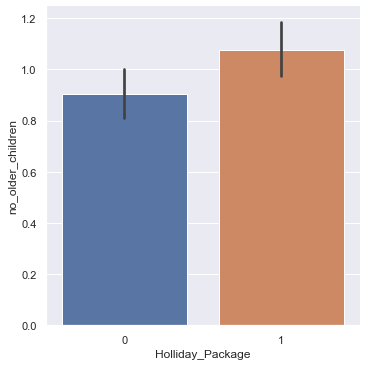

In [212]:
sns.catplot(x='Holliday_Package', y='no_older_children', kind= 'bar' , data=df2)

### Holiday package vs Educ

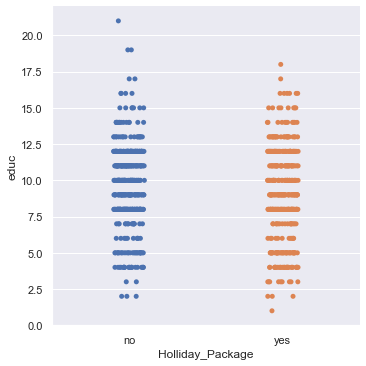

In [137]:
sns.catplot(x='Holliday_Package', y='educ', kind= 'strip' , data=df2)

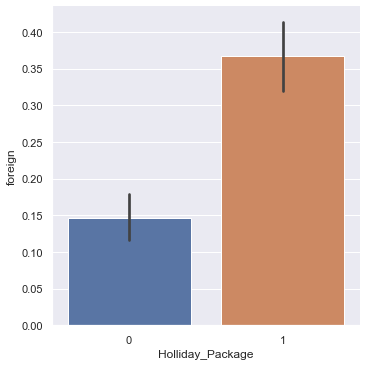

In [214]:
sns.catplot(x='Holliday_Package', y='foreign', kind= 'bar' , data=df2)

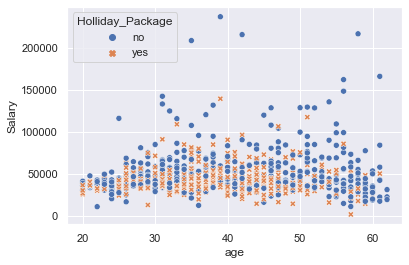

In [138]:
sns.scatterplot(data = df2, x='age',y='Salary', hue = 'Holliday_Package', style='Holliday_Package');

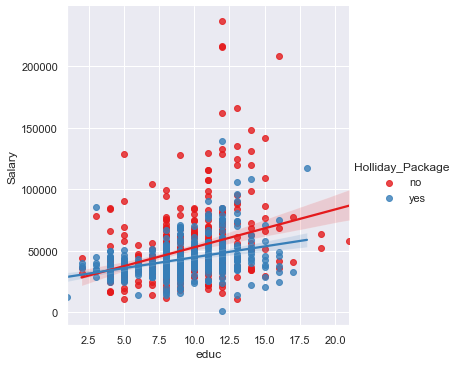

In [139]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=df2,palette="Set1");
#sns.scatterplot(x="educ", y="Salary", hue="Holliday_Package", data=df2,palette="Set1");

### Bivariate analysis

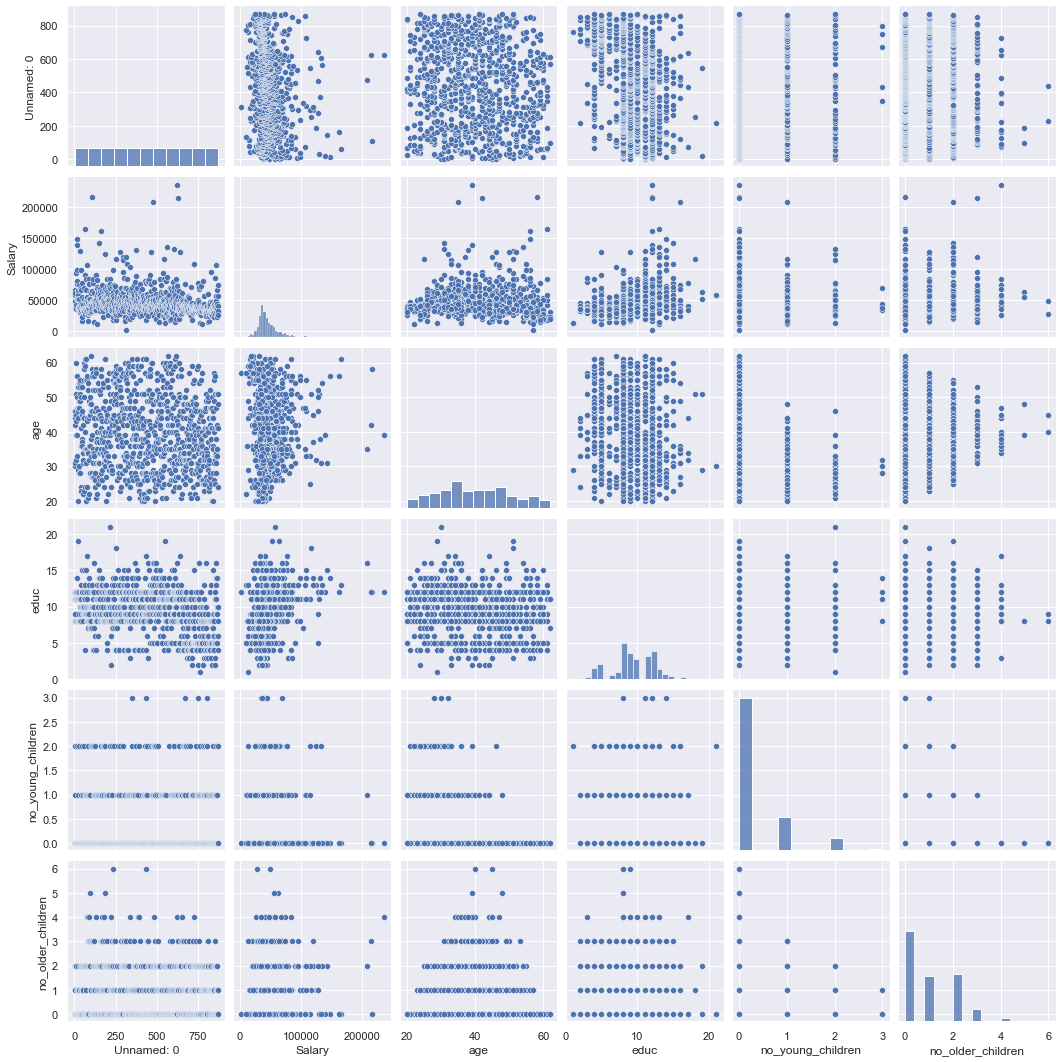

In [140]:
sns.pairplot(df2)

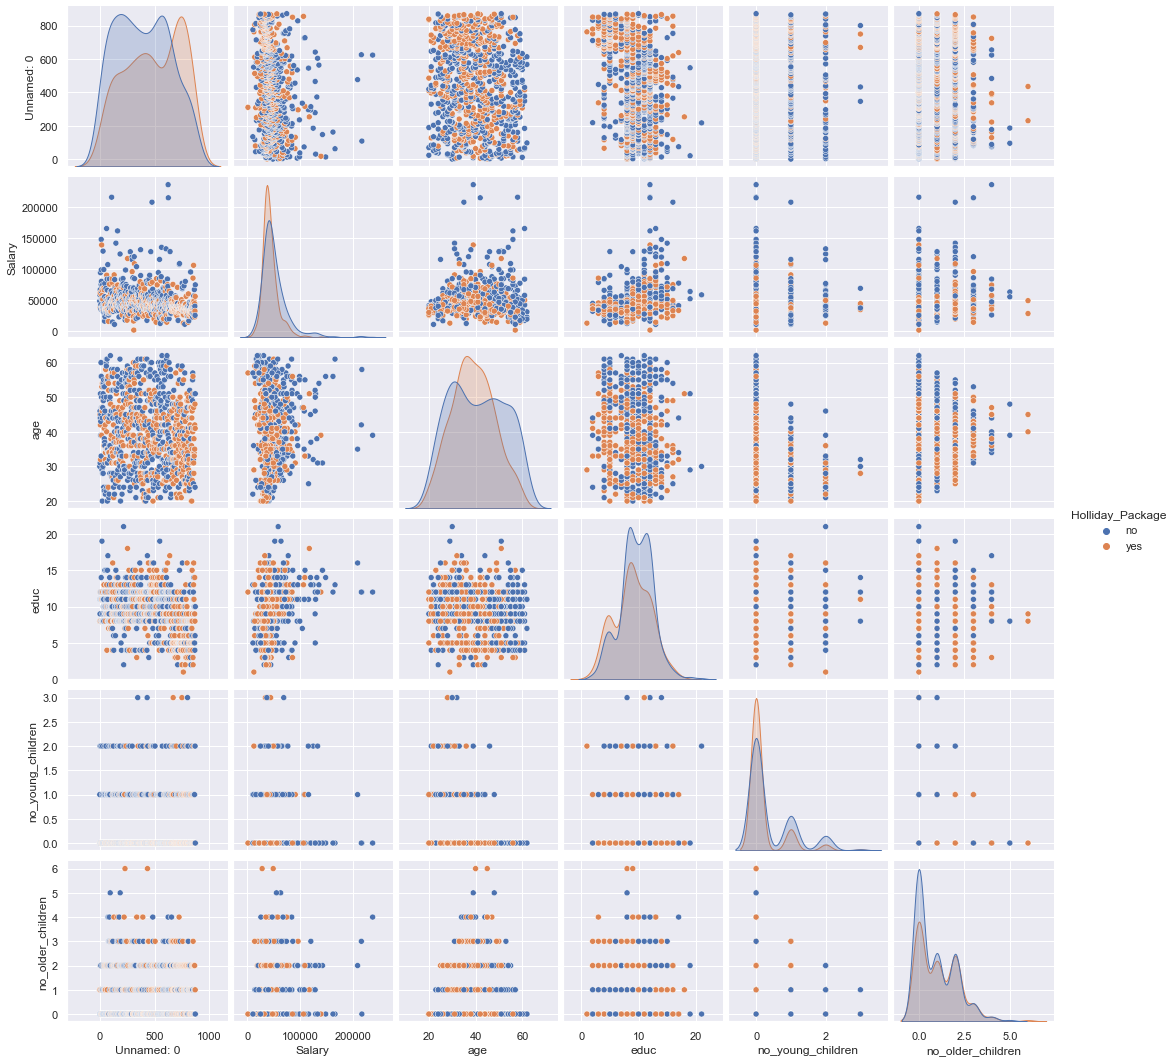

In [141]:
sns.pairplot(df2 ,diag_kind='kde' ,hue='Holliday_Package');

In [142]:
corr_df2 = df2.corr()

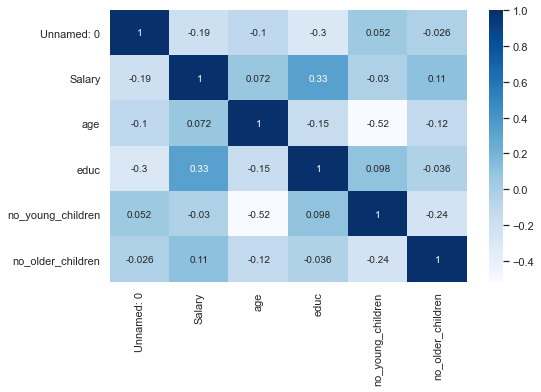

In [143]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_df2, annot=True, cmap='Blues');
plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [144]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes 

In [145]:
df2['Holliday_Package']= df2['Holliday_Package'].astype(int)
df2['foreign'] = df2['foreign'].astype(int)

In [146]:
df2.dtypes

Unnamed: 0           int64
Holliday_Package     int32
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign              int32
dtype: object

In [150]:
df2.head() # All dtypes are converted into integer values.

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,0,48412,30,8,1,1,0
1,2,1,37207,45,8,0,1,0
2,3,0,58022,46,9,0,0,0
3,4,0,66503,31,11,2,0,0
4,5,0,66734,44,12,0,2,0


In [147]:
# Copy all the predictor variables into X dataframe
X = df2.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df2['Holliday_Package']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify = df2['Holliday_Package'])

In [149]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 7)
X_test (262, 7)
y_train (610,)
y_test (262,)


In [151]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [152]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [153]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.604369,0.395631
1,0.577361,0.422639
2,0.471305,0.528695
3,0.648076,0.351924
4,0.631984,0.368016


In [154]:
model.score(X_train, y_train)

0.6131147540983607

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

Training data

### AUC and ROC for the training data

AUC: 0.639


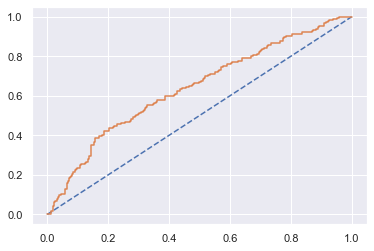

In [155]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Confusion matrix

In [156]:
confusion_matrix(y_train, ytrain_predict)

array([[235,  94],
       [142, 139]], dtype=int64)

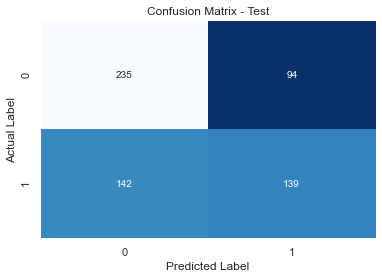

In [157]:
sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test')
plt.show()

In [158]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67       329
           1       0.60      0.49      0.54       281

    accuracy                           0.61       610
   macro avg       0.61      0.60      0.60       610
weighted avg       0.61      0.61      0.61       610



Test

In [159]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.5954198473282443

AUC: 0.639


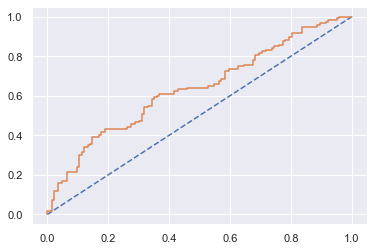

In [160]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [161]:
confusion_matrix(y_test, ytest_predict)

array([[101,  41],
       [ 65,  55]], dtype=int64)

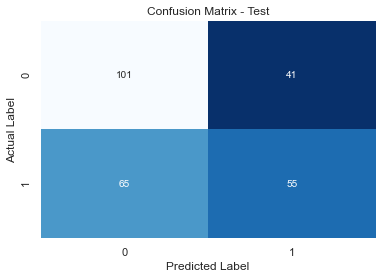

In [162]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test')
plt.show()

In [163]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66       142
           1       0.57      0.46      0.51       120

    accuracy                           0.60       262
   macro avg       0.59      0.58      0.58       262
weighted avg       0.59      0.60      0.59       262



### Grid search

In [164]:
grid={'penalty':['l2','none'],
      'solver':['liblinear','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001],
      'max_iter': [10000, 5000,15000]}

In [165]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [166]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'max_iter': [10000, 5000, 15000],
                         'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [167]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, solver='liblinear', tol=1e-05)


In [170]:
best_model = grid_search.best_estimator_

In [171]:

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [172]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.665572,0.334428
1,0.627195,0.372805
2,0.680148,0.319852
3,0.590952,0.409048
4,0.541584,0.458416


In [173]:
best_model.score(X_train, y_train)

0.6557377049180327

In [174]:
confusion_matrix(y_train, best_model.predict(X_train))

array([[250,  79],
       [131, 150]], dtype=int64)

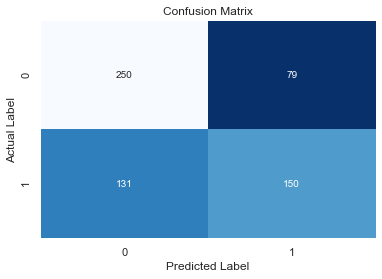

In [175]:
confusion_matrix(y_train,best_model.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model.predict(X_train)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [176]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.76      0.70       329
           1       0.66      0.53      0.59       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610
 



In [177]:
best_model.score(X_test, y_test)

0.6603053435114504

In [178]:
confusion_matrix(y_test, best_model.predict(X_test))

array([[111,  31],
       [ 58,  62]], dtype=int64)

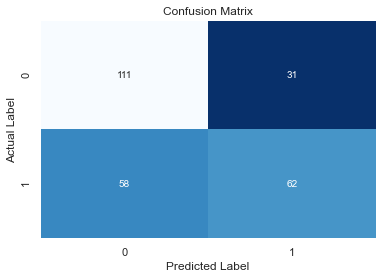

In [179]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,best_model.predict(X_test))
sns.heatmap(confusion_matrix(y_test,best_model.predict(X_test)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [180]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       142
           1       0.67      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



AUC for the Training Data: 0.729
AUC for the Test Data: 0.716


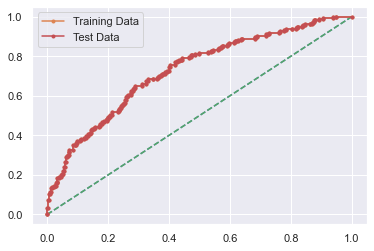

In [181]:
# AUC and ROC for the training data
probs = best_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
probs_t = best_model.predict_proba(X_test)
probs_t = probs_t[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs_t)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lg_test_fpr, lg_test_tpr, thresholds = metrics.roc_curve(y_test,probs_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA model 


In [182]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [183]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

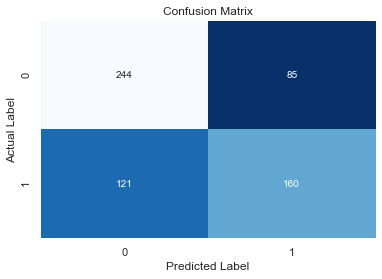

In [184]:
confusion_matrix(y_train,pred_class_train)
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

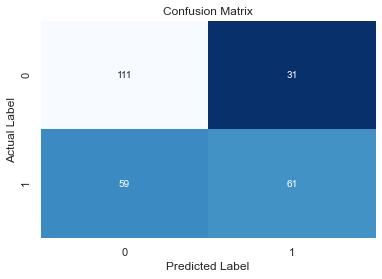

In [185]:
confusion_matrix(y_test,pred_class_test)
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [186]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.78      0.71       142
           1       0.66      0.51      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



In [187]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [188]:
pred_prob_train[:,1]

array([0.73434903, 0.28256676, 0.38443807, 0.7714563 , 0.46217879,
       0.44342039, 0.3748084 , 0.27948189, 0.60554604, 0.63264587,
       0.25586965, 0.2461855 , 0.38062338, 0.0431658 , 0.23650906,
       0.38656111, 0.52783363, 0.31182525, 0.63466569, 0.62433621,
       0.63258567, 0.25587045, 0.88272895, 0.34919534, 0.09619099,
       0.83527049, 0.22079545, 0.74172479, 0.49937881, 0.1755319 ,
       0.32476362, 0.34838027, 0.35905652, 0.42446574, 0.29534415,
       0.31795614, 0.1177228 , 0.53393095, 0.4785944 , 0.24162178,
       0.23545581, 0.81075858, 0.49144679, 0.74630394, 0.79887676,
       0.37168697, 0.28351626, 0.9330853 , 0.41737302, 0.70731371,
       0.75620235, 0.48992796, 0.79549197, 0.39814839, 0.23367276,
       0.73689819, 0.26290648, 0.55014365, 0.66295749, 0.37096317,
       0.61503355, 0.57066774, 0.52857231, 0.4630566 , 0.5580278 ,
       0.62587747, 0.11556175, 0.5971582 , 0.41005335, 0.2424785 ,
       0.35684781, 0.75195082, 0.77204978, 0.23280376, 0.41474

AUC for the Training Data: 0.734
AUC for the Test Data: 0.714


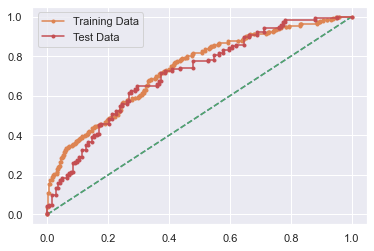

In [189]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Recall Score 0.9964
F1 Score 0.64 

Confusion Matrix


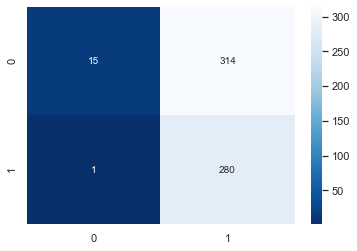

0.2 

Recall Score 0.9644
F1 Score 0.6491 

Confusion Matrix


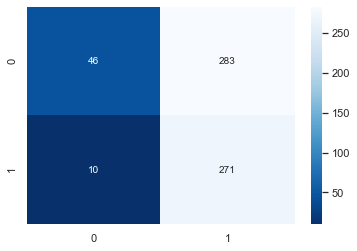

0.3 

Recall Score 0.8826
F1 Score 0.6703 

Confusion Matrix


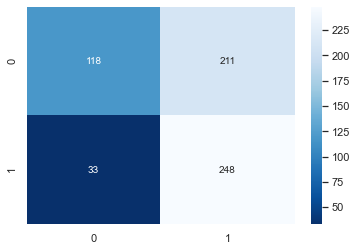

0.4 

Recall Score 0.758
F1 Score 0.6751 

Confusion Matrix


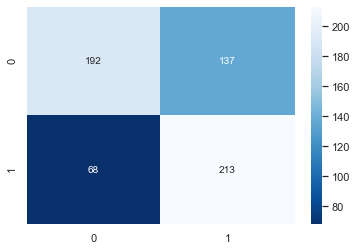

0.5 

Recall Score 0.5694
F1 Score 0.6084 

Confusion Matrix


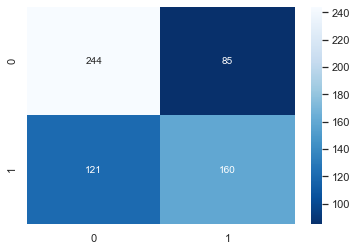

0.6 

Recall Score 0.427
F1 Score 0.5345 

Confusion Matrix


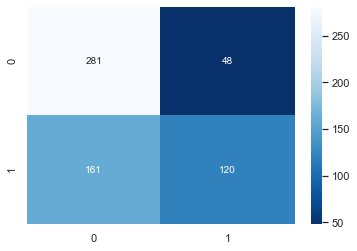

0.7 

Recall Score 0.2883
F1 Score 0.4286 

Confusion Matrix


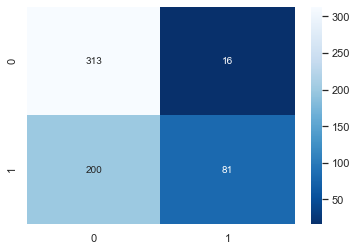

0.8 

Recall Score 0.1103
F1 Score 0.1975 

Confusion Matrix


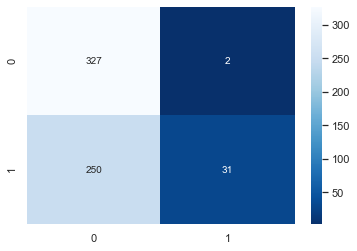

0.9 

Recall Score 0.0071
F1 Score 0.0141 

Confusion Matrix


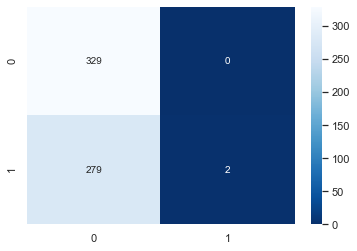

In [190]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g',cmap='Blues_r'),'\n\n'
    plt.show();

AUC for the Training Data: 0.734
AUC for the Test Data: 0.714


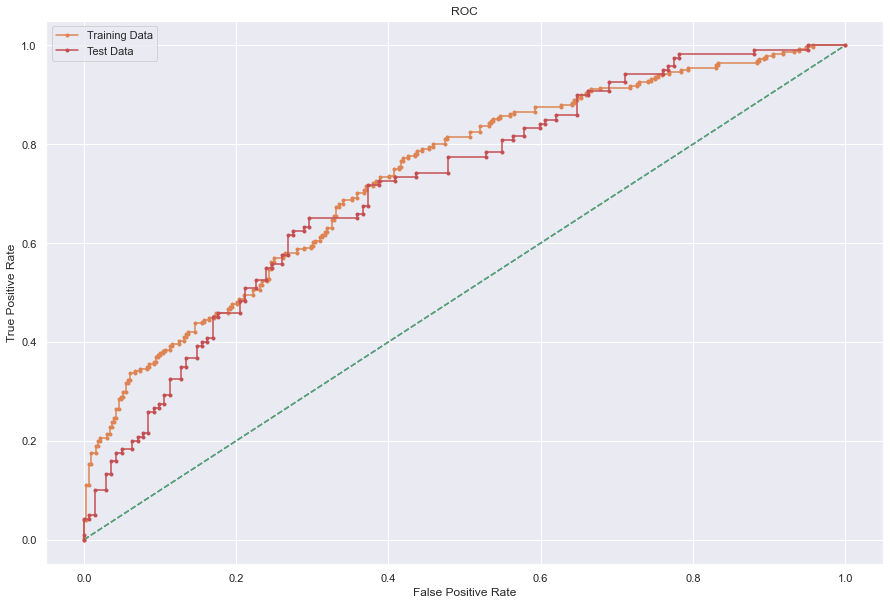

In [191]:
# AUC and ROC for the training data
plt.figure(figsize=(15,10))

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [192]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)
    

In [193]:
import numpy as np
my_list = data_pred_custom_cutoff
m_array = np.asarray(my_list)
m_array

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

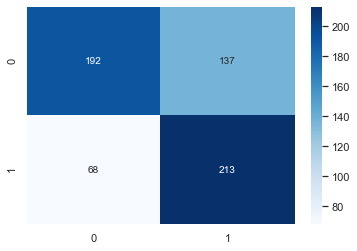

In [194]:
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');

In [195]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.74      0.58      0.65       329
           1       0.61      0.76      0.68       281

    accuracy                           0.66       610
   macro avg       0.67      0.67      0.66       610
weighted avg       0.68      0.66      0.66       610
 



In [196]:
ldamodel_train_score = round(metrics.accuracy_score(y_train,data_pred_custom_cutoff),4)
ldamodel_train_score

0.6639

In [197]:
#Predicting the classes on the test data

data_pred_custom_cutoff_t=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_t.append(a)

In [198]:
ldamodel_test_score = round(metrics.accuracy_score(y_test,data_pred_custom_cutoff_t),4)
ldamodel_test_score

0.645

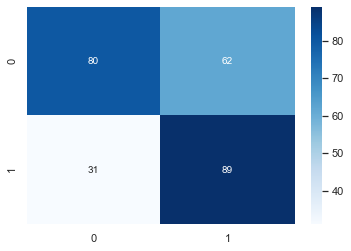

In [199]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff_t)),annot=True,fmt='.5g',cmap='Blues');

In [200]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff_t),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.78      0.71       142
           1       0.66      0.51      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.56      0.63       142
           1       0.59      0.74      0.66       120

    accuracy                           0.65       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



### comparison of performance metrics between models

In [201]:
cmetrics=classification_report(y_train,best_model.predict(X_train),output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(df.loc["1"][2],2)
lg_train_recall=round(df.loc["1"][1],2)
lg_train_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.656168,0.759878,0.704225,329.000000
1,0.655022,0.533808,0.588235,281.000000
accuracy,0.655738,0.655738,0.655738,0.655738
macro avg,0.655595,0.646843,0.646230,610.000000
weighted avg,0.655640,0.655738,0.650794,610.000000


In [202]:
cmetrics=classification_report(y_test,best_model.predict(X_test),output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(df.loc["1"][2],2)
lg_test_recall=round(df.loc["1"][1],2)
lg_test_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.656805,0.781690,0.713826,142.000000
1,0.666667,0.516667,0.582160,120.000000
accuracy,0.660305,0.660305,0.660305,0.660305
macro avg,0.661736,0.649178,0.647993,262.000000
weighted avg,0.661322,0.660305,0.653521,262.000000


In [203]:
cmetrics=metrics.classification_report(y_train,data_pred_custom_cutoff, output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.738462,0.583587,0.651952,329.000000
1,0.608571,0.758007,0.675119,281.000000
accuracy,0.663934,0.663934,0.663934,0.663934
macro avg,0.673516,0.670797,0.663536,610.000000
weighted avg,0.678627,0.663934,0.662624,610.000000


In [204]:
cmetrics=classification_report(y_test,data_pred_custom_cutoff_t,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
df

,precision,recall,f1-score,support
0,0.720721,0.563380,0.632411,142.000000
1,0.589404,0.741667,0.656827,120.000000
accuracy,0.645038,0.645038,0.645038,0.645038
macro avg,0.655062,0.652523,0.644619,262.000000
weighted avg,0.660576,0.645038,0.643594,262.000000


In [205]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[best_model.score(X_train, y_train),metrics.roc_auc_score(y_train,probs),lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':[best_model.score(X_test, y_test),metrics.roc_auc_score(y_test,probs_t),lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,metrics.roc_auc_score(y_train,pred_prob_train[:,1]),lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,metrics.roc_auc_score(y_test,pred_prob_test[:,1]),lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test
Accuracy,0.66,0.66,0.66,0.64
AUC,0.73,0.72,0.73,0.71
Recall,0.53,0.52,0.76,0.74
Precision,0.66,0.67,0.61,0.59
F1 Score,0.59,0.58,0.68,0.66
